In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\91986\OneDrive\Desktop\E-comCustomerSegmentation\data\cleaned_data.csv')

In [4]:
from itertools import combinations

In [7]:
from collections import Counter

In [9]:
transactions = df.groupby('TransactionNo')['ProductName'].apply(list)
transactions = transactions[transactions.apply(lambda x: len(x) >= 2)]

In [10]:
pair_counts = Counter()

for order in transactions:
    pair_counts.update(combinations(sorted(order), 2))

In [11]:
combo_df = pd.DataFrame.from_dict(pair_counts, orient='index').reset_index()
combo_df.columns = ['Product_Pair', 'Frequency']
combo_df['Product_A'] = combo_df['Product_Pair'].apply(lambda x: x[0])
combo_df['Product_B'] = combo_df['Product_Pair'].apply(lambda x: x[1])

In [13]:
combo_df = combo_df.sort_values('Frequency', ascending=False).head(10)

combo_df[['Product_A', 'Product_B', 'Frequency']]

,Product_A,Product_B,Frequency
903521,Green Regency Teacup And Saucer,Pink Regency Teacup And Saucer,894
12380,Jumbo Bag Pink Polkadot,Jumbo Bag Red Retrospot,863
98609,Green Regency Teacup And Saucer,Roses Regency Teacup And Saucer,845
6390,Jumbo Bag Red Retrospot,Jumbo Storage Bag Suki,747
7874,Lunch Bag Black Skull,Lunch Bag Red Retrospot,699
7938,Lunch Bag Red Retrospot,Lunch Bag Suki Design,695
17305,Jumbo Bag Red Retrospot,Jumbo Shopper Vintage Red Paisley,694
95,Alarm Clock Bakelike Green,Alarm Clock Bakelike Red,690
1053301,Pink Regency Teacup And Saucer,Roses Regency Teacup And Saucer,678
4264,Lunch Bag Black Skull,Lunch Bag Suki Design,647


Visualization

C:\Users\91986\AppData\Local\Temp\ipykernel_10924\491998255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Pair_Label', data=combo_df, palette='plasma')


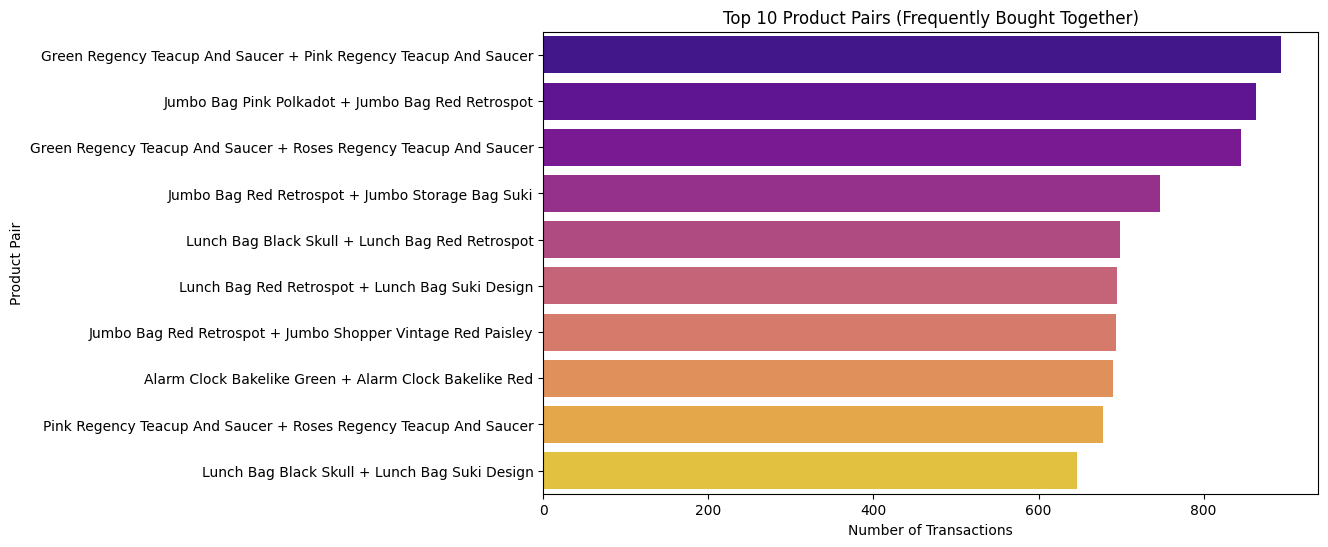

In [14]:
plt.figure(figsize=(10, 6))

combo_df['Pair_Label'] = combo_df['Product_A'] + " + " + combo_df['Product_B']

sns.barplot(x='Frequency', y='Pair_Label', data=combo_df, palette='plasma')
plt.title('Top 10 Product Pairs (Frequently Bought Together)')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Pair')
plt.show()

In [15]:
combo_df.drop(columns=['Product_Pair']).to_csv('Product_Associations.csv', index=False)